In [5]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the columns of dataframe
pd.pandas.set_option('display.max_columns', None)

In [10]:
#load the dataset
df = pd.read_csv('heart_disease_dataset.csv')

In [11]:
#print shape of dataset with rows and columns
df.shape

(1025, 14)

In [16]:
#show the first 10 rows of dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [17]:
# To show all the features in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
# to check the missing values
df.isnull().sum()>0

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [19]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presnce'

In [24]:
# adding new column to dataset of converted data

df['heart_disease'] = df['target'].apply(heart_diseases)

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,presnce
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,absence
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,absence
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,presnce


In [26]:
# to count the number of people having heart diseases and NOT having heart diseases

hd = df.groupby('heart_disease')['target'].count()
hd

heart_disease
absence    499
presnce    526
Name: target, dtype: int64

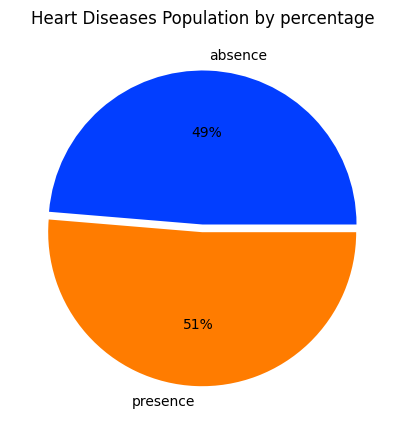

In [27]:
# to plot the bar chart of above using matplotlib and seaborn

plt.figure(figsize=(5,5))
clrs = sns.color_palette('bright')
explode = [0, 0.05]
plt.pie(hd, labels=['absence','presence'], autopct='%0.0f%%', colors=clrs, explode=explode)
plt.title('Heart Diseases Population by percentage')
plt.show()

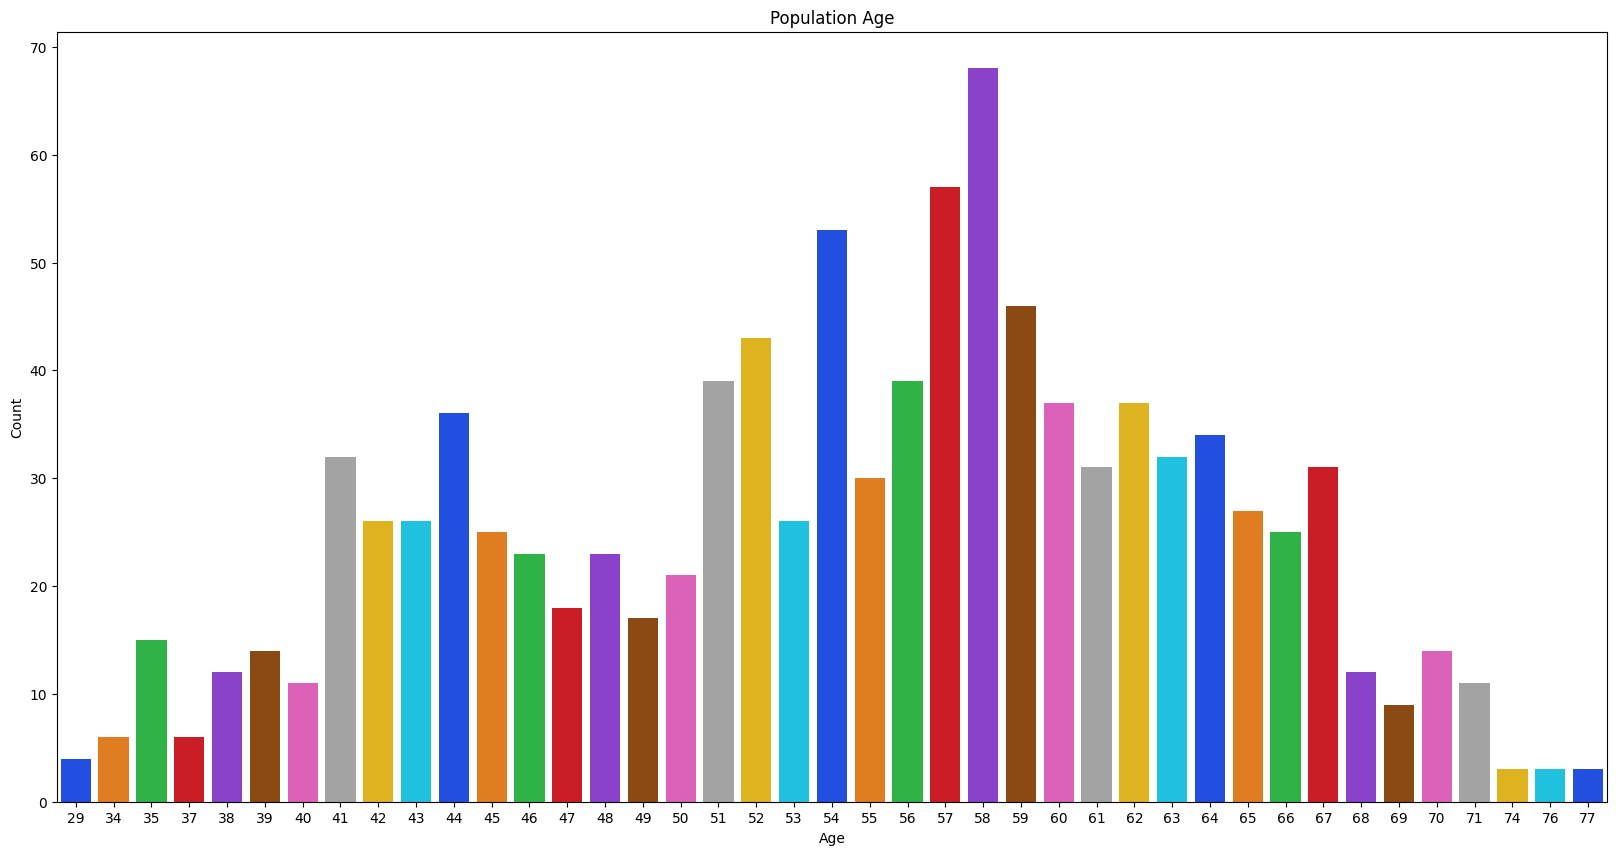

In [30]:
# plotting countplot of population age using matplotlib and seaborn

plt.figure(figsize=(20,10))
plt.title('Population Age')
sns.countplot(x='age', data=df, hue='age', palette='bright', legend=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [31]:
# To find the minimum, maximum and average of the population age using statistical analysis

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

The minimum age is 29
The maximum age is 77
The average age is 54.43


In [32]:
# To divide the population age in different categories

young_age = df[(df['age']>=29) & (df['age']<40)]
middle_age = df[(df['age']>=40) & (df['age']<55)]
old_age = df[(df['age']>55)]
print(f"Number of young age people = {len(young_age)}")
print(f'Number of middle age people = {len(middle_age)}')
print(f'Number of old age people = {len(old_age)}')

Number of young age people = 57
Number of middle age people = 419
Number of old age people = 519


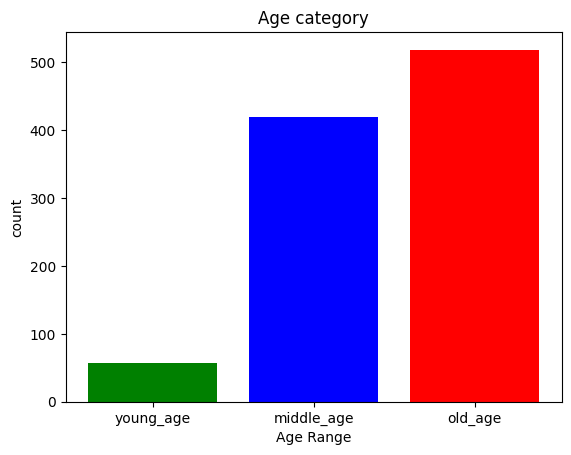

In [33]:
# Bar plot using matplotlib and seaborn for different categories of population age

cat = ['young_age','middle_age','old_age']
_count = [len(young_age), len(middle_age), len(old_age)]
plt.bar(cat, _count, color=['green', 'blue','red'])
plt.title('Age category')
plt.xlabel('Age Range')
plt.ylabel('count')
plt.show()

In [34]:
# converting numerical data into categorical data 

def age_range(row):
    '''converting population age into range of age'''
    if row>=29 and row<40:
        return 'youngAge'
    elif row>=40 and row<55:
        return 'middleAge'
    else:
        return 'oldAge'

In [36]:
# applying converted data into our dataset

df['ageRange'] = df['age'].apply(age_range)
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,presnce,oldAge
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,absence,oldAge


In [37]:
# converting numerical data into categorical data 

def _sex(row):
    if row==1:
        return 'male'
    else:
        return 'female'

In [38]:
# applying converted data into our dataset

df['gender'] = df['sex'].apply(_sex)
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge,female
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,presnce,oldAge,female
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,absence,oldAge,male


C:\Users\pamar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


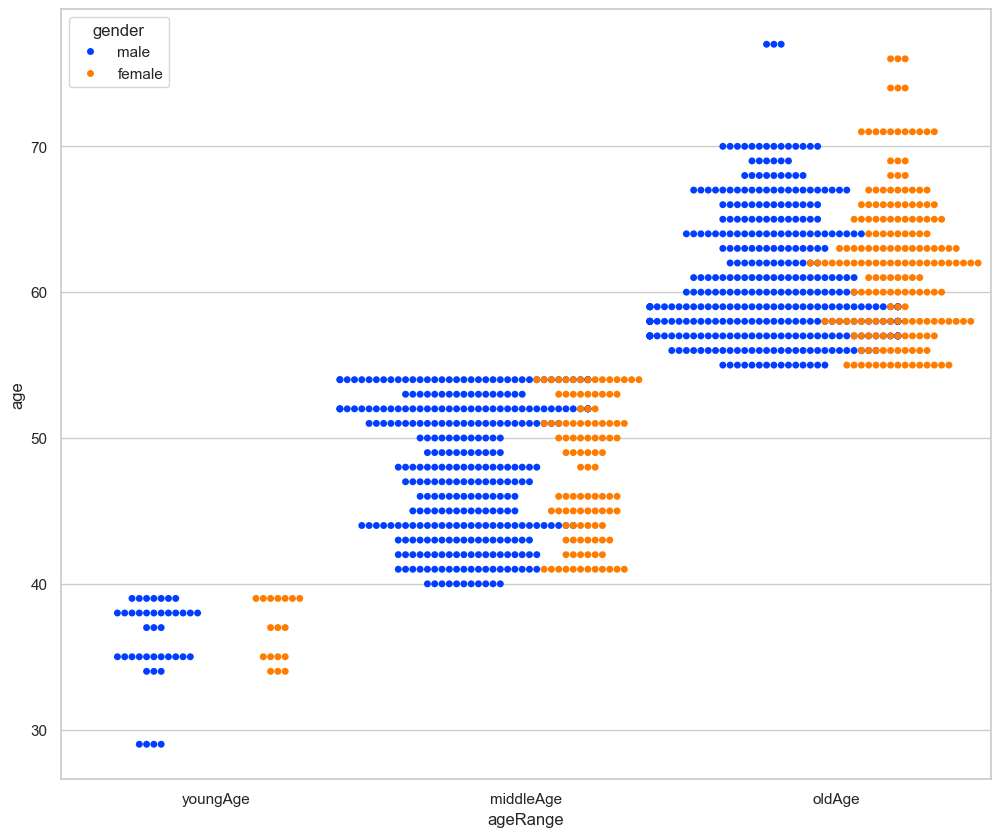

In [47]:
# Scatter plot creation Age category vs gender using matplotlib

plt.figure(figsize=(12,10))
x=df.ageRange
y=df.age
sns.set(style='whitegrid', palette='bright')
sns.swarmplot(x=x, y=y, hue='gender', data=df, dodge=True, order=['youngAge', 'middleAge', 'oldAge'])
plt.show()

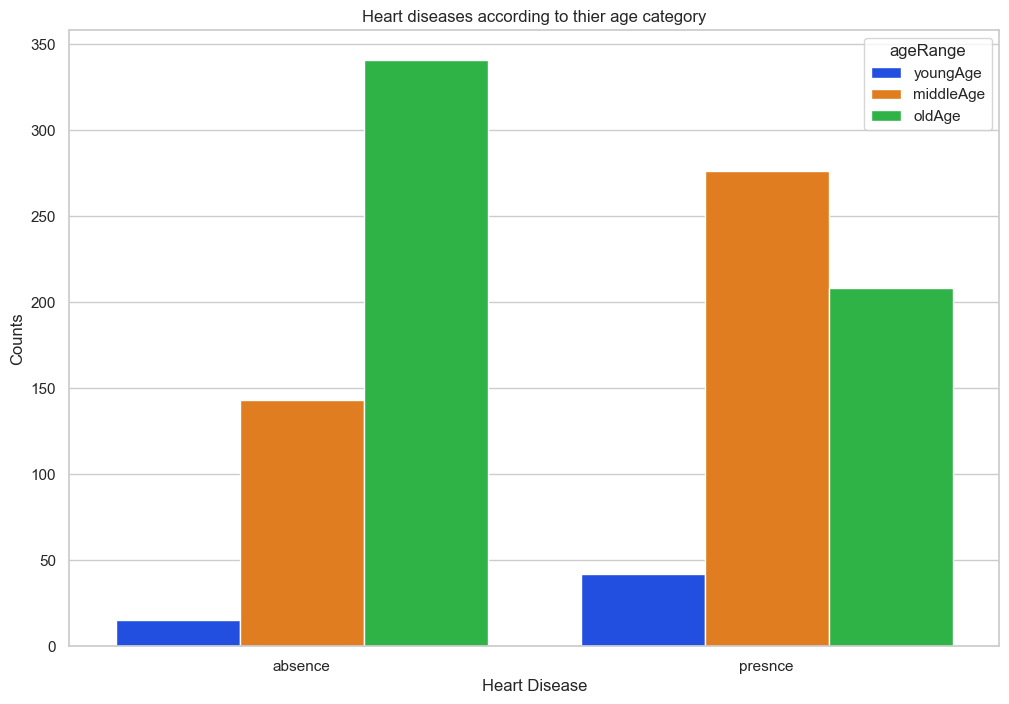

In [48]:
# count plot for heart diseases according to thier age category

plt.figure(figsize=(12,8))
hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Heart diseases according to thier age category")
sns.countplot(x='heart_disease', hue='ageRange', data=df, hue_order=hue_orders, palette='bright')
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

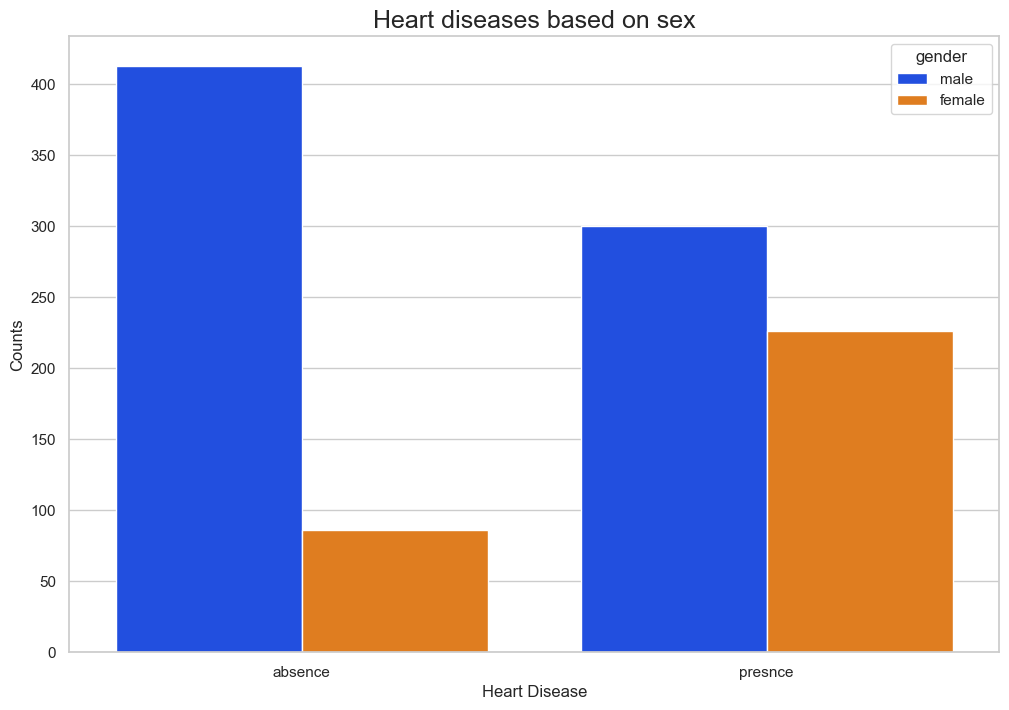

In [49]:
# count plot for heart diseases based on sex

plt.figure(figsize=(12,8))
plt.title("Heart diseases based on sex", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='gender', data=df, palette="bright")
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

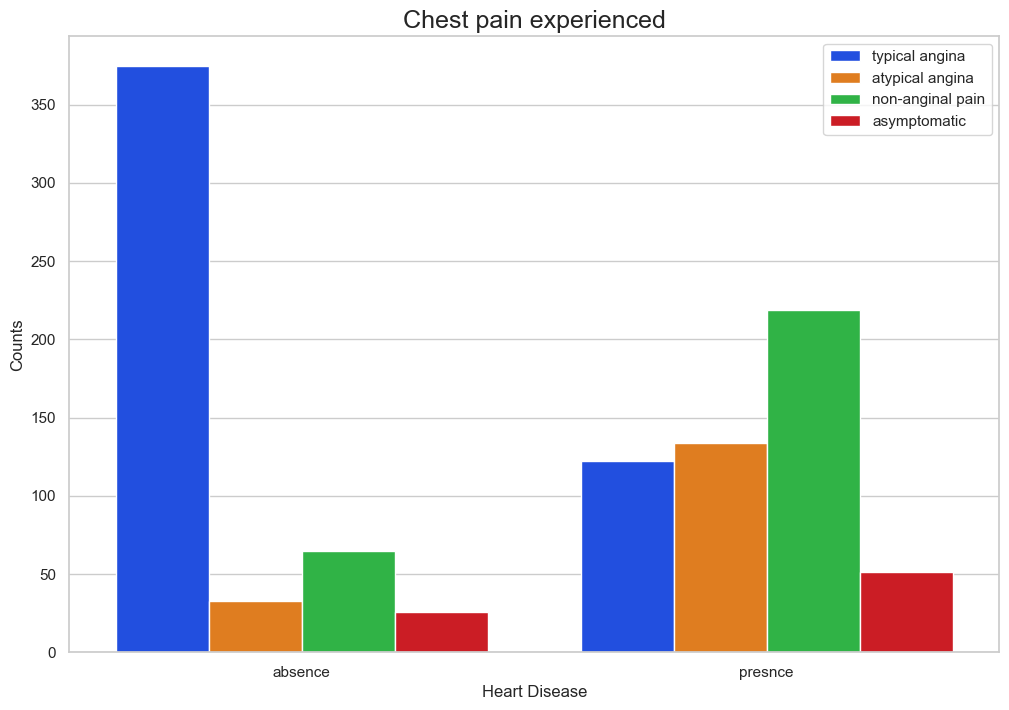

In [50]:
# count plot based on chest pain experienced

plt.figure(figsize=(12,8))
# hue_orders = ['youngAge', 'middleAge', 'oldAge']
plt.title("Chest pain experienced", fontsize=18)
sns.countplot(x=df['heart_disease'], hue='cp', data=df, palette="bright")
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel("Heart Disease")
plt.ylabel('Counts')
plt.show()

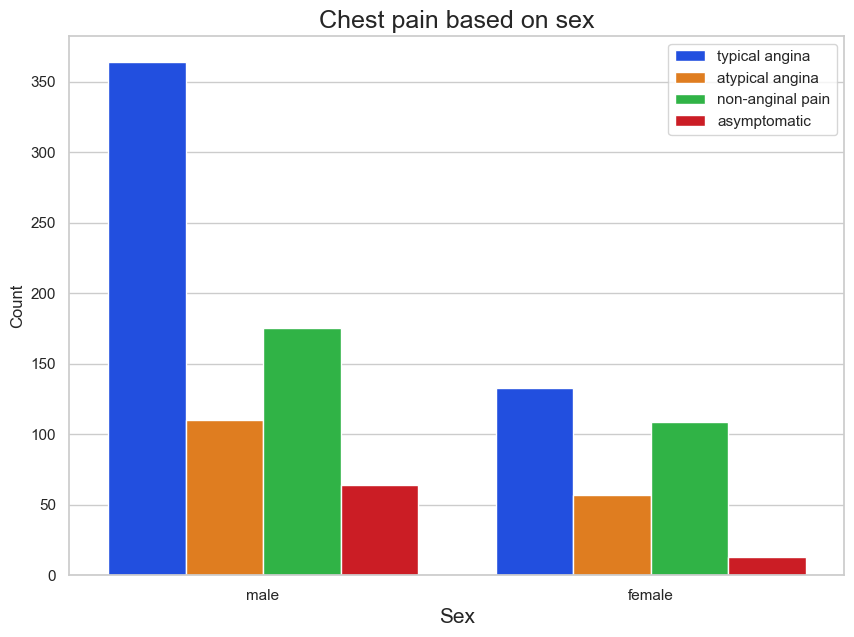

In [61]:
# Count plot for chest pain based on gender

plt.figure(figsize=(10,7))
plt.title("Chest pain based on sex", fontsize=18)
sns.countplot(x='gender', hue='cp', data=df, palette='bright')
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Count')
plt.show()

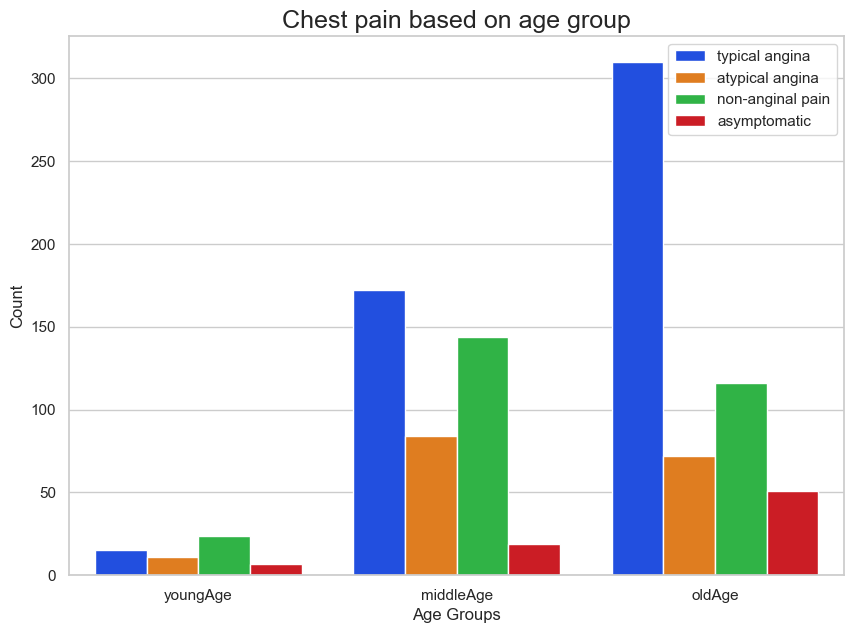

In [62]:
# Count plot for chest pain vs age group using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title("Chest pain based on age group", fontsize=18)
sns.countplot(x=df['ageRange'], hue='cp', data=df, palette='bright', order=['youngAge', 'middleAge', 'oldAge'])
plt.legend(labels=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

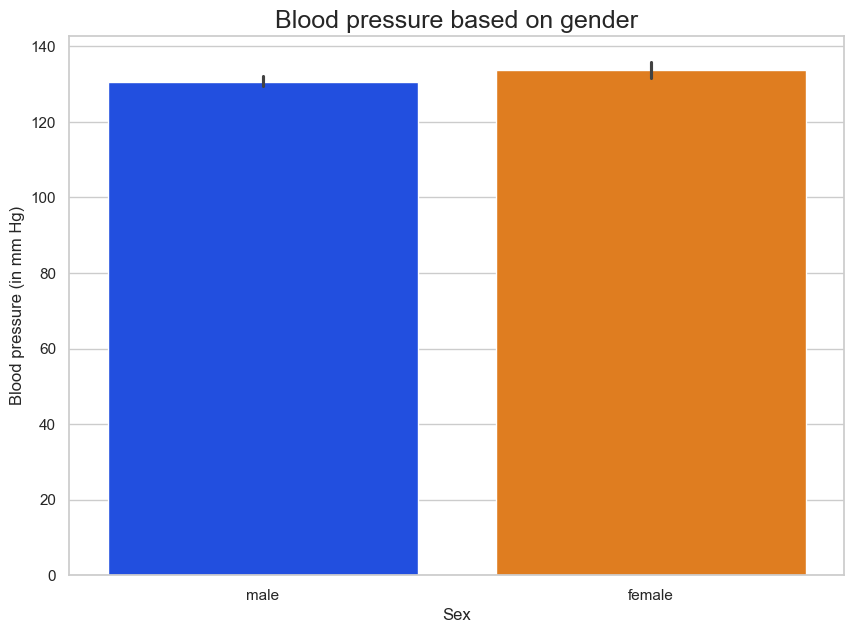

In [64]:
# Bar graph for Restin blood pressure(trestbs)(in mm Hg) based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure based on gender', fontsize=18)
sns.barplot(x='gender', y='trestbps', hue='gender', data=df, palette='bright', legend=False)
plt.xlabel('Sex')
plt.ylabel('Blood pressure (in mm Hg)')
plt.show()


C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\3988450603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='chol', data=df, palette='bright')


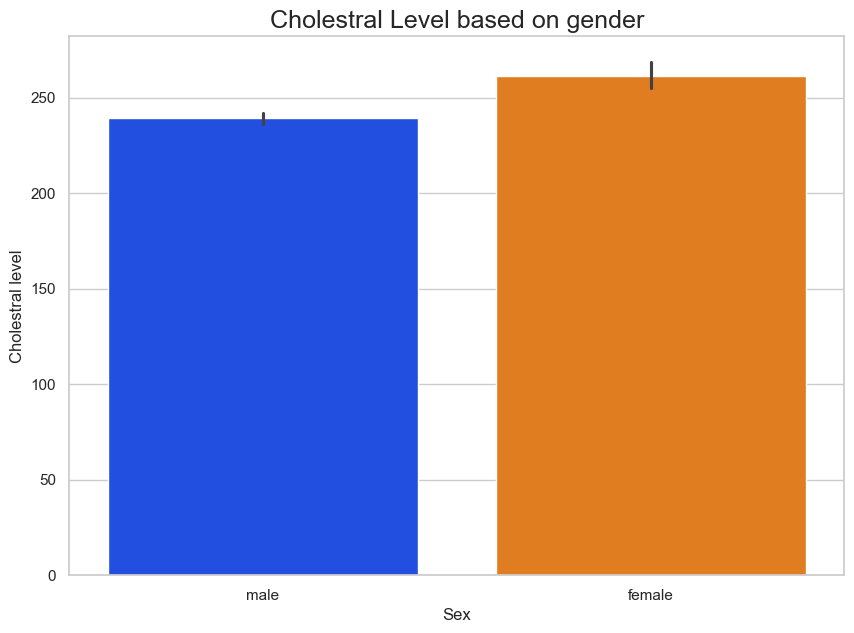

In [70]:
# Bar graph for Cholestral level based on gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level based on gender', fontsize=18)
sns.barplot(x='gender', y='chol', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Cholestral level')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\2475367162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='chol', data=df, palette='bright')


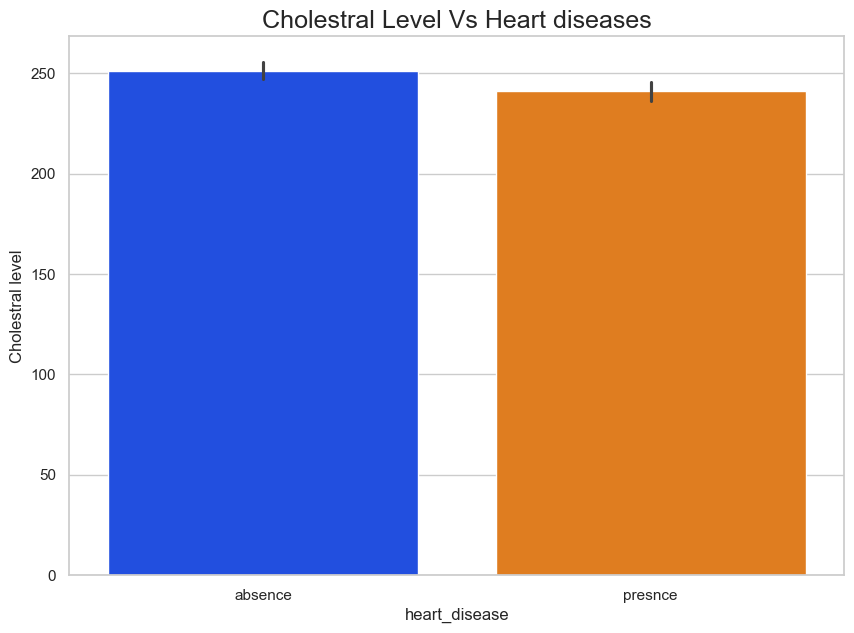

In [71]:
# Bar graph for Cholestral level vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral Level Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='chol', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Cholestral level')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\3026908464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='trestbps', data=df, palette='bright')


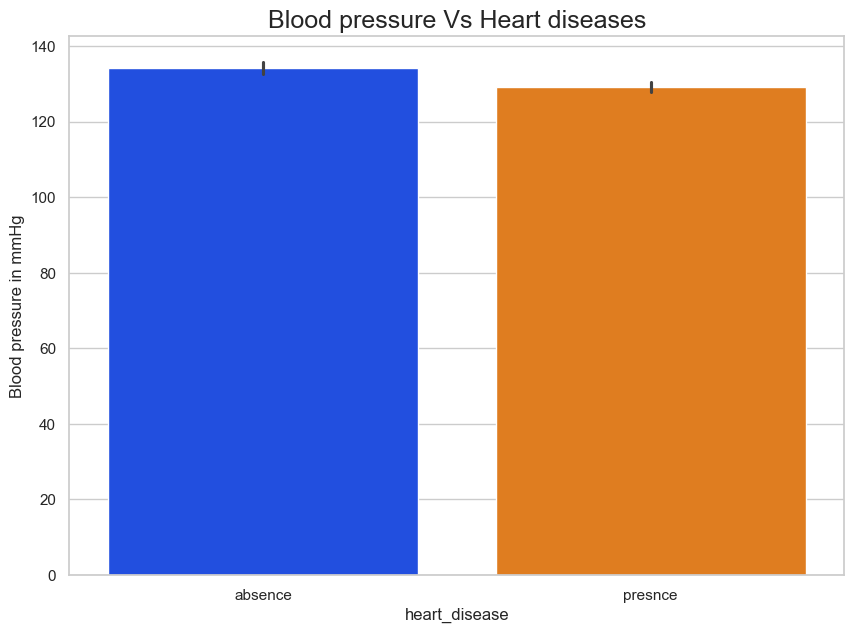

In [72]:
# Bar graph for Blood pressure vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='trestbps', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Blood pressure in mmHg')
plt.show()


C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\1199767370.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='trestbps',data=df, palette='bright')


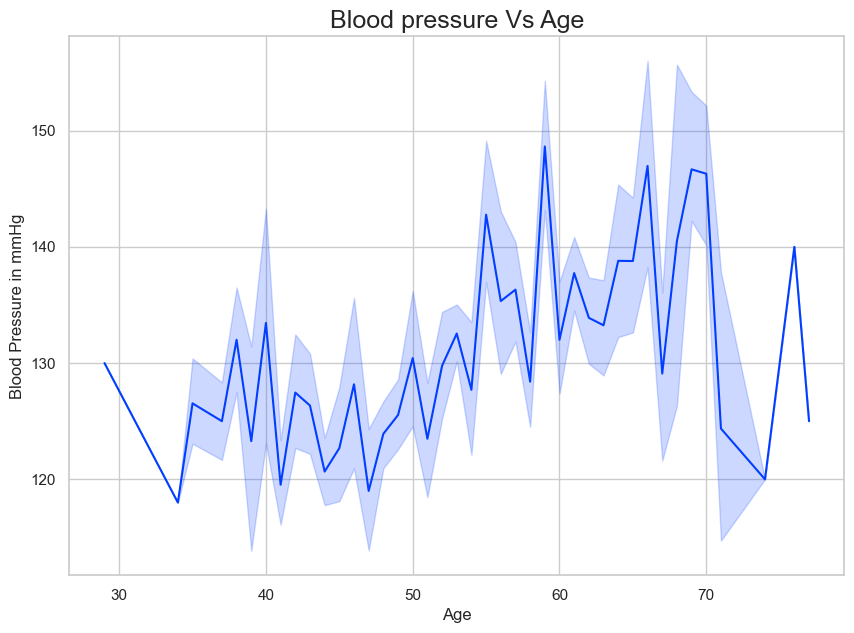

In [73]:
# Line plot for blood pressue vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Blood pressure Vs Age', fontsize=18)
sns.lineplot(x='age', y='trestbps',data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Blood Pressure in mmHg')
plt.show()

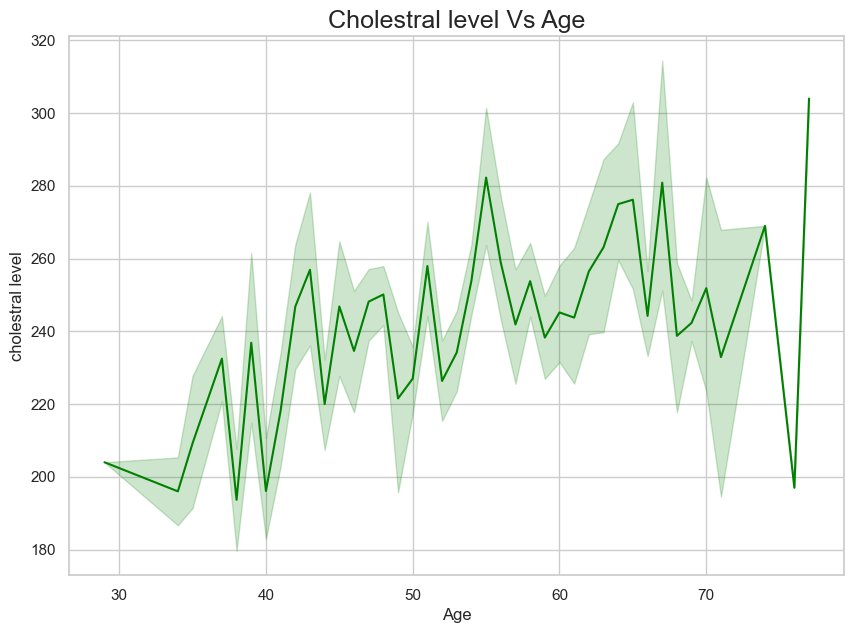

In [74]:
# Line plot for cholestral level vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Cholestral level Vs Age', fontsize=18)
sns.lineplot(x='age', y='chol',data=df, color='green')
plt.xlabel('Age')
plt.ylabel('cholestral level')
plt.show()

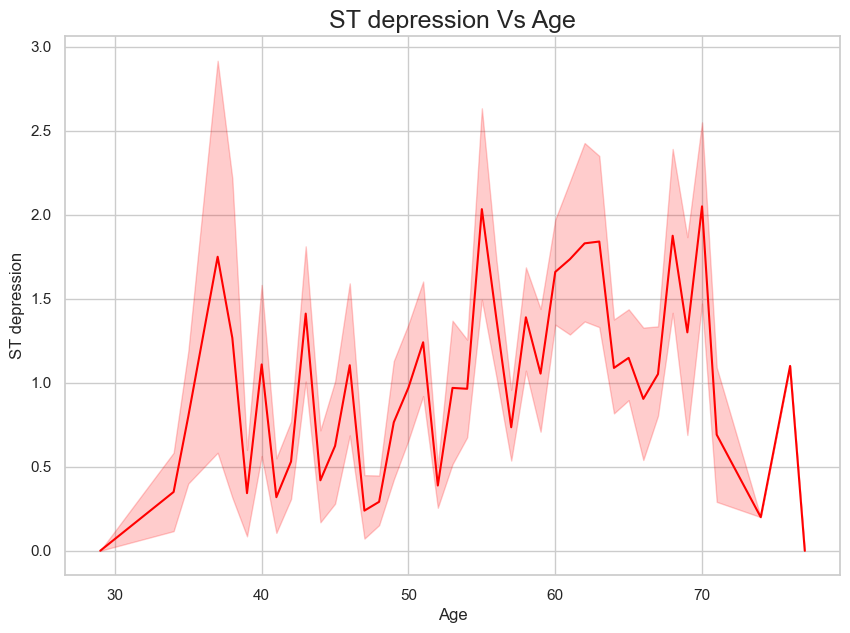

In [75]:
# Line plot for ST depression vs age using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST depression Vs Age', fontsize=18)
sns.lineplot(x='age', y='oldpeak',data=df, color='red')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\699793643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')


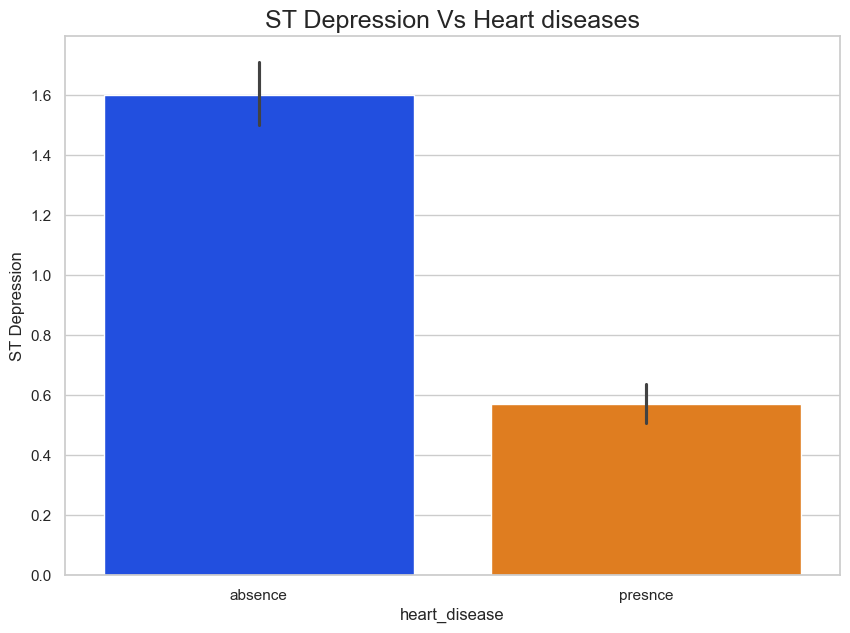

In [76]:
# Bar graph for ST Depression vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='oldpeak', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('ST Depression')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\1047820317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='oldpeak', data=df, palette='bright')


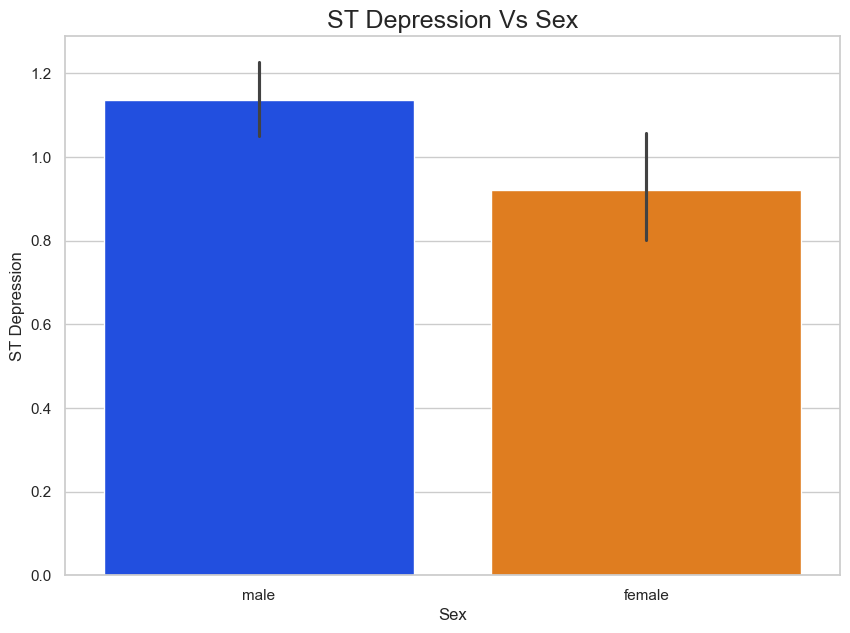

In [77]:
# Bar graph for ST Depression vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('ST Depression Vs Sex', fontsize=18)
sns.barplot(x='gender', y='oldpeak', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('ST Depression')
plt.show()


C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\1712931498.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='heart_disease', y='exang', data=df, palette='bright')


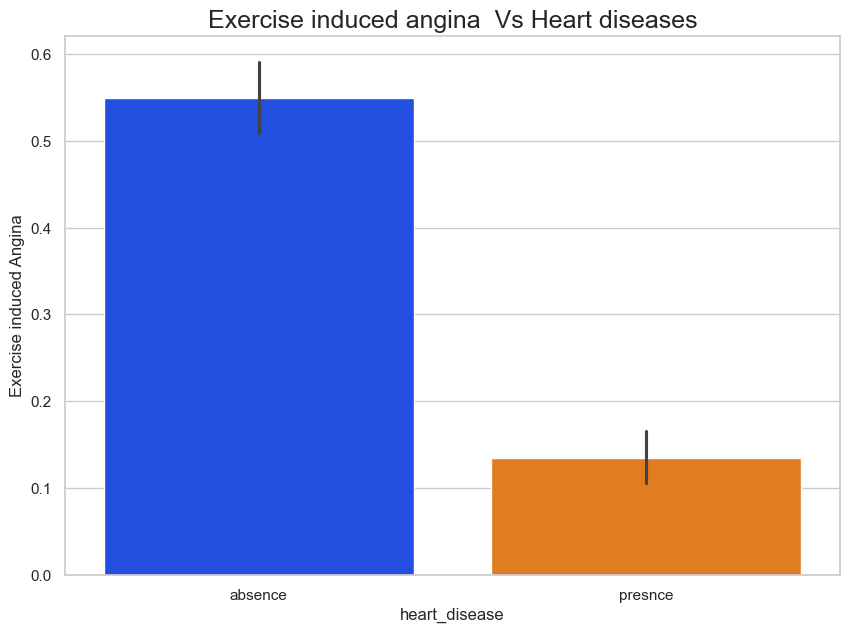

In [78]:
# Bar graph for exercise induced Angina vs Heart diseases using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced angina  Vs Heart diseases', fontsize=18)
sns.barplot(x='heart_disease', y='exang', data=df, palette='bright')
plt.xlabel('heart_disease')
plt.ylabel('Exercise induced Angina')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\1189624077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='exang', data=df, palette='bright')


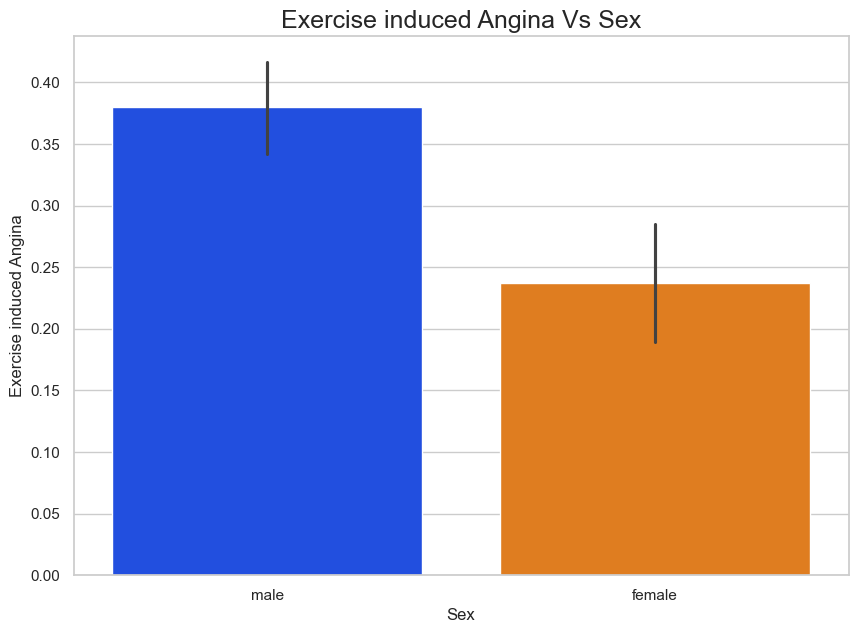

In [79]:
# Bar graph for Exercise induced Angina vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Exercise induced Angina Vs Sex', fontsize=18)
sns.barplot(x='gender', y='exang', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Exercise induced Angina')
plt.show()

C:\Users\pamar\AppData\Local\Temp\ipykernel_20492\3089860903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='fbs', data=df, palette='bright')


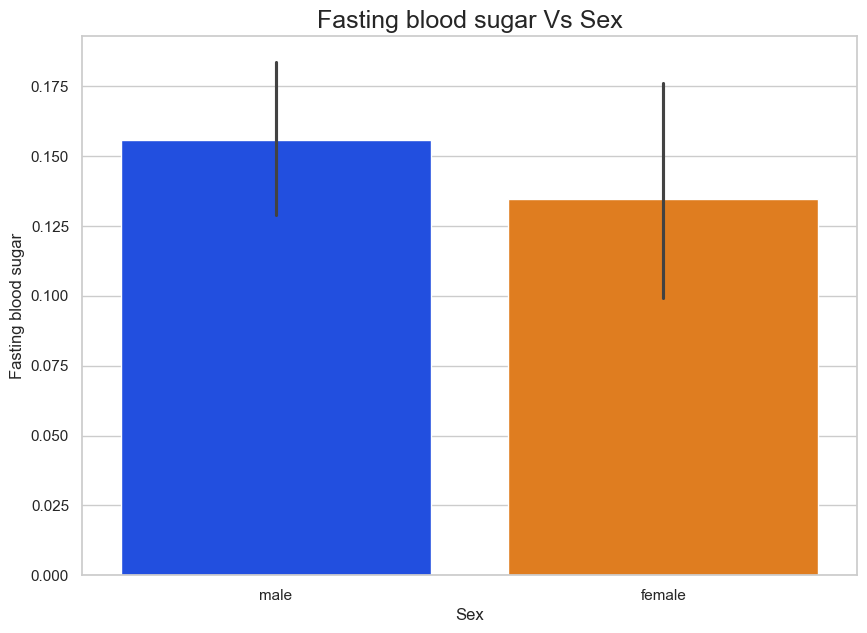

In [80]:
# Bar graph for Fasting blood sugar vs Gender using matplotlib and seaborn

plt.figure(figsize=(10,7))
plt.title('Fasting blood sugar Vs Sex', fontsize=18)
sns.barplot(x='gender', y='fbs', data=df, palette='bright')
plt.xlabel('Sex')
plt.ylabel('Fasting blood sugar')
plt.show()


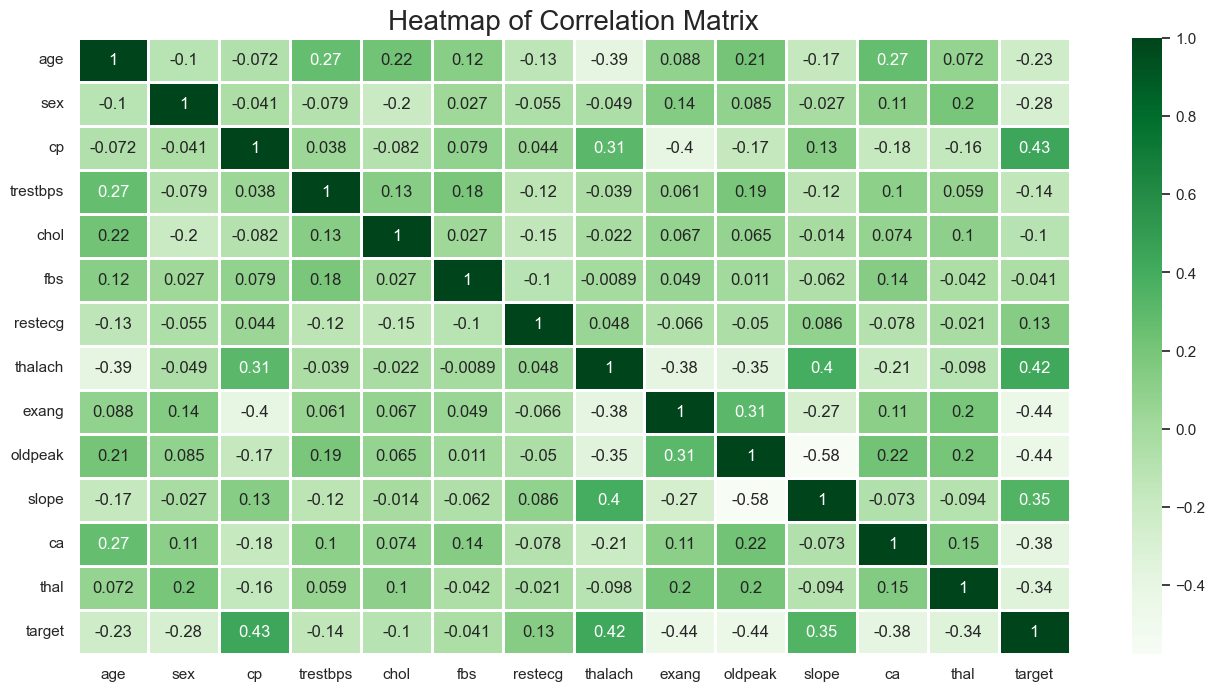

In [85]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Heatmap usng seaborn

plt.figure(figsize=(16, 8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=2, linecolor='white', cmap="Greens")
plt.title('Heatmap of Correlation Matrix', fontsize=20)
plt.show()

In [86]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,presnce,oldAge,male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,absence,oldAge,male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,absence,middleAge,male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,presnce,middleAge,female


In [90]:
# exporting final dataset to as csv file for Dashboarding in Power BI

df.to_csv(r"C:\Users\pamar\OneDrive\Desktop\Jupyter\your_file_name.csv", index=False)
